In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
#一次实验，n枚硬币，1为正面，0为反面，返回正面次数
def simu(n):
    X = np.random.randint(0, 2, (n,10)) #n枚硬币，投10次
    X1 = np.sum(X, axis=1) #行的和，即每枚硬币朝上的次数
    C1 = X1[0]  #第一枚硬币
    Crand = X1[np.random.randint(0,n)]  #随机一枚硬币
    Cmin = np.min(X1)  #正面朝上次数最少的硬币
    return C1,Crand,Cmin  #返回题目要求的三枚硬币结果

In [9]:
#记录三枚(种)硬币的实验结果
R1 = [0] * 11  #可能包含0次到10次11种情况
Rrand = [0] * 11
Rmin = [0] * 11
#1000枚硬币
n = 1000
#10000次实验
m = 10000
for i in range(m):
    C1, Crand, Cmin = simu(1000)
    R1[C1] += 1
    Rrand[Crand] += 1
    Rmin[Cmin] += 1

In [7]:
#总计朝上的次数
def total(R):
    s = 0
    for i in range(len(R)):
        s += i * R[i]
    return s

* 1、三枚硬币正面朝上的平均数？  
注：每枚硬币共投了10*10000次，即100000次。

In [10]:
T1 = total(R1)
Trand = total(Rrand)
Tmin = total(Rmin)
print('三枚硬币正面朝上的平均数为{}次'.format((T1+Trand+Tmin)/3))

三枚硬币正面朝上的平均数为34479.666666666664次


* 2、三枚硬币正面朝上的概率分别是多少？

In [16]:
V1 = total(R1) / 100000
Vrand = total(Rrand) / 100000
Vmin = total(Rmin) /100000
print('硬币C1朝上的概率为：',V1)
print('硬币Crand朝上的概率为：',Vrand)
print('硬币Cmin朝上的概率为：',Vmin)

硬币C1朝上的概率为： 0.50041
硬币Crand朝上的概率为： 0.49688
硬币Cmin朝上的概率为： 0.0371


Text(0.5, 1.0, '硬币Cmin结果分布')

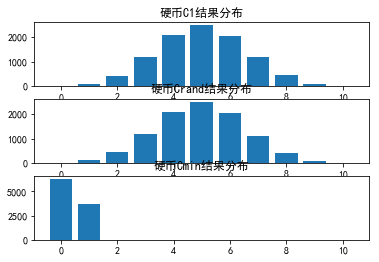

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.bar(range(11),R1)
ax1.set_title('硬币C1结果分布')
ax2 = fig.add_subplot(312)
ax2.bar(range(11),Rrand)
ax2.set_title('硬币Crand结果分布')
ax3 = fig.add_subplot(313)
ax3.bar(range(11),Rmin)
ax3.set_title('硬币Cmin结果分布')

* 3

In [25]:
epsilon = np.arange(0, 2, 0.01)
size = epsilon.shape[0]

Z1 = np.zeros(size)
Zrand = np.zeros(size)
Zmin = np.zeros(size)

In [26]:
#计算P(|u-v|>epsilon)
for i in range(size):
    for j in range(11):
        if abs((j - 5) / 10.0)> epsilon[i]:
            Z1[i] += R1[j]
            Zrand[i] += Rrand[j]
            Zmin[i] += Rmin[j]
Z1 = Z1 / m
Zrand = Zrand / m
Zmin = Zmin / m

In [29]:
#Hoeffding上界
Z = np.array([2 * np.exp(-2*(i**2)*10) for i in epsilon])

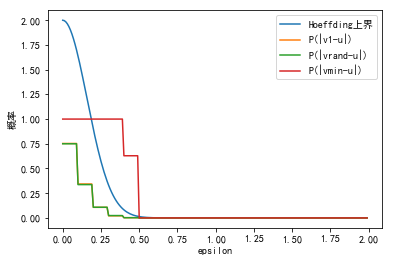

In [30]:
plt.plot(epsilon, Z, label='Hoeffding上界')
plt.plot(epsilon, Z1, label='P(|v1-u|)')
plt.plot(epsilon, Zrand, label='P(|vrand-u|)')
plt.plot(epsilon, Zmin, label='P(|vmin-u|)')
plt.xlabel('epsilon')
plt.ylabel('概率')
plt.legend()
plt.show()